In [73]:
import csv
import glob
import torch
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path
from skimage import io, morphology

In [28]:
data_dir = Path('/home/tony/Documents/cell_data/DSB2018plus/stage_1_train')
#data_dir = Path('/home/tony/Documents/cell_data/HE')
paths = [path for path in data_dir.iterdir() if path.is_dir()]
num_paths = len(paths)
print(num_paths)

664


In [29]:
random_seed = 0
np.random.seed(int(random_seed))
np.random.shuffle(paths)

In [30]:
with open('DSB_train_val_split.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for idx, p in enumerate(paths):
        if idx < int(num_paths * 0.85):
            writer.writerow([str(p), 'train'])
        else:
            writer.writerow([str(p), 'validation'])
    

In [54]:
img_path = list((paths[0] / Path('image')).glob('*.png'))
label_path = list((paths[0] / Path('label')).glob('*.npy'))

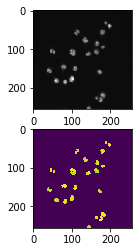

In [55]:
img = np.asarray(io.imread(img_path[0]))
label = np.load(label_path[0])
plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(label)

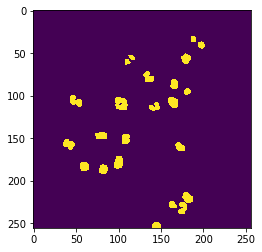

In [74]:
label[np.where(label!=0)] = 1
plt.imshow(label)


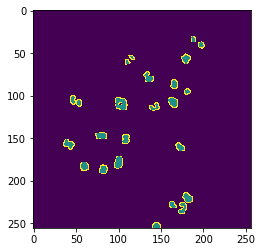

In [87]:
label_ero = morphology.binary_erosion(label, morphology.square(3))
label_edge = label - label_ero
label_012 = label + label_edge
plt.imshow(label_012)

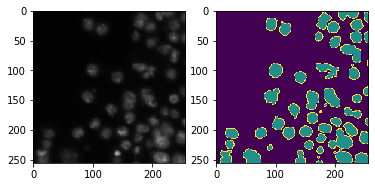

In [96]:
img = np.load('/home/tony/Documents/semi_train_data/15/image.npy')
label = np.load('/home/tony/Documents/semi_train_data/15/label.npy')
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(label)

TypeError: expected str, bytes or os.PathLike object, not int

In [39]:
import random
import torch
from box import Box
import yaml

config = Box.from_yaml(filename='/home/tony/Documents/semi_training/configs/train/unet3d_kits_seg_config.yaml')
config

<Box: {'main': {'random_seed': 'nips2019', 'saved_dir': '/home/peter850706/nips2019/models/kits_seg/unet3d/train'}, 'dataset': {'name': 'KitsSegDataset', 'kwargs': {'data_dir': '/home/peter850706/kits19_preprocessed/data', 'data_split_csv': '/home/peter850706/kits19_preprocessed/dataset_split.csv', 'train_preprocessings': [{'name': 'Normalize'}, {'name': 'RandomCrop', 'kwargs': {'size': [192, 192, 24]}}], 'valid_preprocessings': [{'name': 'Normalize'}, {'name': 'PositiveCrop', 'kwargs': {'positive_sampling_rate': 1.0, 'size': [192, 192, 24]}}], 'augments': [{'name': 'RandomElasticDeformation'}, {'name': 'RandomHorizontalFlip'}, {'name': 'RandomVerticalFlip'}], 'transforms': [{'name': 'ToTensor'}]}}, 'dataloader': {'name': 'Dataloader', 'kwargs': {'train_batch_size': 2, 'valid_batch_size': 1, 'shuffle': True, 'num_workers': 4}}, 'net': {'name': 'UNet3D', 'kwargs': {'in_channels': 1, 'out_channels': 3, 'num_features': [32, 64, 128, 256, 512]}}, 'losses': [{'name': 'DiceLoss', 'weight': 1

In [13]:
config.dataset.kwargs.data_dir

'/home/peter850706/kits19_preprocessed/data'

In [18]:
config.dataset.kwargs.update(type='train')
config.dataset.kwargs.type.dtype

AttributeError: 'str' object has no attribute 'dtype'

In [49]:
a = config.main.loaded_path

BoxKeyError: "'Box' object has no attribute 'loaded_path'"

In [50]:
b = config.main.get('loaded_path')

In [52]:
b==None

True

In [46]:
a

'/home/peter850706/nips2019/models/kits_seg/unet3d/train'

In [47]:
a==b

True

In [48]:
config.main

<Box: {'random_seed': 'nips2019', 'saved_dir': '/home/peter850706/nips2019/models/kits_seg/unet3d/train'}>